In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [17]:
def cmc(t, y, rate_constants, initial_concentrations):
    c1, c2, p = y
    k1, k11, k2, k3, k33, k4 = rate_constants
    e1t, e2t, st = initial_concentrations
    e1 = e1t - c1
    e2 = e2t - c2
    s = st - p - c1 - c2
    dc1 = k1*e1*s - (k11 + k2)*c1
    dc2 = k3*e2*p - (k33 + k4)*c2
    dp =  k2*c1 - k3*e2*p + k33*c2
    return [dc1, dc2, dp]

T_MAX = 30 

# Initial values
init_dict = {"C1": 0, "C2":0, "P": 0 }
initial_values = [v for v in init_dict.values()]

initial_concentrations = {"E1T":10, "E25":10, "ST":3.5}
init_conc = [v for v in initial_concentrations.values()]

# Rate Constants
rate_constant_dict = {"k1": 3.5, "k11":1, "k2":50, "k3": 0.3, "k33":0.25, "k4": 0.25}
rate_constants = [i  for i in rate_constant_dict.values()]


solution = solve_ivp(
    fun=cmc,
    t_span=[0, T_MAX],
    y0=initial_values,
    args=[rate_constants, init_conc],
    rtol = 1e-11, 
    atol = 1e-13,
    method = 'BDF', 
    dense_output = True
)


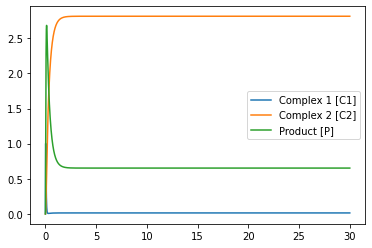

In [29]:
plt.plot(solution.t, solution.y[0], label = "Complex 1 [C1]")
plt.plot(solution.t, solution.y[1], label = "Complex 2 [C2]")
plt.plot(solution.t, solution.y[2], label = "Product [P]")
plt.legend()
plt.show()